In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir_path='./Data/'
f_app=os.path.join(dir_path,'application_train.csv')
app_train=pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
sub_df=pd.DataFrame(app_train.groupby(['CNT_CHILDREN']).size(),columns=['CNT_CHILDREN_GROUP'])
sub_df.head()

,CNT_CHILDREN_GROUP
CNT_CHILDREN,
0,215371
1,61119
2,26749
3,3717
4,429


In [60]:
print(app_train.groupby(['CNT_CHILDREN']).size())

print('\n',sub_df.query('CNT_CHILDREN<1').sum())

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
dtype: int64

 CNT_CHILDREN_GROUP    215371
dtype: int64


In [55]:
#D13-1
sub_df2=pd.DataFrame({'0':[sub_df.query('CNT_CHILDREN<1').sum()],
                  '1-2':[sub_df.query('CNT_CHILDREN<3 and CNT_CHILDREN>=1').sum()],
                  '3-5':[sub_df.query('CNT_CHILDREN<6 and CNT_CHILDREN>=3').sum()],
                  '5-':[sub_df.query('CNT_CHILDREN>5').sum()]})
sub_df2.head()

,0,1-2,3-5,5-
0,CNT_CHILDREN_GROUP 215371 dtype: int64,CNT_CHILDREN_GROUP 87868 dtype: int64,CNT_CHILDREN_GROUP 4230 dtype: int64,CNT_CHILDREN_GROUP 42 dtype: int64


In [83]:
#D13-2 
sub_df3=app_train.loc[::,['CNT_CHILDREN','TARGET','AMT_INCOME_TOTAL']].groupby(['CNT_CHILDREN']).apply(lambda x: x.mean())

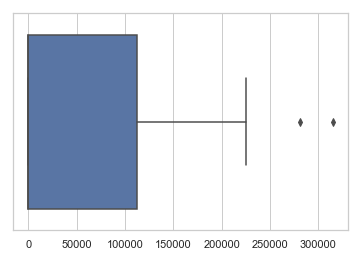

In [84]:
import seaborn as sns
sns.set(style='whitegrid')
ax=sns.boxplot(x=sub_df3)

In [94]:
#D13-3 
sub_df4=app_train.loc[::,['CNT_CHILDREN','TARGET','AMT_INCOME_TOTAL']].groupby(['CNT_CHILDREN']).apply(lambda x: ((x-x.mean())/x.std()))

sub_df4

,CNT_CHILDREN,TARGET,AMT_INCOME_TOTAL
0,NaN,3.459345,0.345856
1,NaN,-0.289071,0.990553
2,NaN,-0.289071,-0.943538
3,NaN,-0.289071,-0.298841
4,NaN,-0.289071,-0.427780
5,NaN,-0.289071,-0.642679
6,NaN,-0.313013,-0.009650
7,NaN,-0.289071,1.850149
8,NaN,-0.289071,-0.513740
9,NaN,-0.289071,-0.298841
